In [1]:
import xarray as xr
import numpy as np
import pylab as plt
import pandas as pd
from  area_grid_boxes import area_grid

In [2]:
emibvoc_gfdl = xr.open_mfdataset('/Users/ptg21/data/CMIP6_processed_data/emibvoc//emibvoc_AERmon_GFDL*')
areas = area_grid(emibvoc_gfdl.lat, emibvoc_gfdl.lon)
emibvoc_gfdl['emibvoc'] = emibvoc_gfdl.emibvoc*areas
emisums_gfdl = np.sum(emibvoc_gfdl, axis=(1,2))*24.*3600.*30.
year_month_idx = pd.MultiIndex.from_arrays([emibvoc_gfdl['time.year']])#, emisums['time.month']])
emisums_gfdl.coords['year_month'] = ('time', year_month_idx)

gfdl_emisums_monthly = (emisums_gfdl).groupby('year_month').sum()

In [3]:
# %%bash
# ncdump -h /scratch/ptg21/netscratch/CMIP6_data/emibvoc_AERmon_GFDL-ESM4_historical_r1i1p1f1_gr1_185001-194912.nc



In [4]:
# %%bash
# ncdump -h /scratch/ptg21/netscratch/CMIP6_data/emibvoc_AERmon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc

In [5]:
# %%bash
# ncdump -h /scratch/ptg21/netscratch/CMIP6_data/emibvoc_AERmon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc

In [6]:
emibvoc_ukesm1 = xr.open_mfdataset('/Users/ptg21/data/CMIP6_processed_data/emibvoc//emibvoc_AERmon_UK*')
areas = area_grid(emibvoc_ukesm1.lat, emibvoc_ukesm1.lon)
emibvoc_ukesm1['emibvoc'] = emibvoc_ukesm1.emibvoc*areas
emisums_ukesm1 = np.sum(emibvoc_ukesm1, axis=(1,2))*24.*3600.*30.
year_month_idx = pd.MultiIndex.from_arrays([emibvoc_ukesm1['time.year']])#, emisums['time.month']])
emisums_ukesm1.coords['year_month'] = ('time', year_month_idx)
ukesm1_emisums_monthly = (emisums_ukesm1).groupby('year_month').sum()

In [7]:
emibvoc_cesm2 = xr.open_mfdataset('/Users/ptg21/data/CMIP6_processed_data/emibvoc//emibvoc_AERmon_CESM2-WACCM*r1*')
areas = area_grid(emibvoc_cesm2.lat, emibvoc_cesm2.lon)
emibvoc_cesm2['emibvoc'] = emibvoc_cesm2.emibvoc*areas
emisums_cesm2 = np.sum(emibvoc_cesm2.emibvoc, axis=(1,2))*24.*3600.*30.
year_month_idx = pd.MultiIndex.from_arrays([emibvoc_cesm2['time.year']])#, emisums['time.month']])
emisums_cesm2.coords['year_month'] = ('time', year_month_idx)
cesm2_waccm_emisums_monthly = (emisums_cesm2).groupby('year_month').sum()

/opt/anaconda3/envs/basemap3/lib/python3.6/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'emibvoc' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


In [8]:
# MRI data
mri_co = pd.read_csv('data/co_burdens_MRI-ESM2-0_1850-2100.csv')
mri_co.index = pd.to_datetime(mri_co['run'], format='%Y')
mri_co =mri_co.groupby(mri_co.index.year).mean()

In [9]:
mri_no = pd.read_csv('data/no_burden_MRI-ESM2-0_1850-2100.csv')
mri_no.index = pd.to_datetime(mri_no['run'], format='%Y')
mri_no =mri_no.groupby(mri_no.index.year).mean()

In [10]:
mri_no2 = pd.read_csv('data/no2_burdens_MRI-ESM2-0_1850-2100.csv')
mri_no2.index = pd.to_datetime(mri_no2['run'], format='%Y')
mri_no2 =mri_no2.groupby(mri_no2.index.year).mean()

In [11]:
mri_eminox = pd.read_csv('data/eminox_MRI-ESM2-0.csv')
mri_eminox.index = pd.to_datetime(mri_eminox['Year'], format='%Y')
mri_eminox =mri_eminox.groupby(mri_eminox.index.year).mean()

In [12]:
mri_emibvoc = pd.read_csv('data/eminox_MRI-ESM2-0.csv')
mri_emibvoc.index = pd.to_datetime(mri_emibvoc['Year'], format='%Y')
mri_emibvoc['r1i1p1f1'] =  559.61
mri_emibvoc = mri_emibvoc.groupby(mri_emibvoc.index.year).mean()

In [13]:
mri_emico = pd.read_csv('data/emico_MRI-ESM2-0.csv')
mri_emico.index = pd.to_datetime(mri_emico['Year'], format='%Y')
mri_emico =mri_emico.groupby(mri_emico.index.year).mean()


In [14]:
mri_emilnox = pd.read_csv('data/LNOx.CMIP6_MRI-ESM2.csv')
mri_emilnox.index = pd.to_datetime(mri_emilnox['year'], format='%Y')
mri_emilnox = mri_emilnox.groupby(mri_emilnox.index.year).mean()

In [15]:
ukesm1_emilnox = pd.read_csv('data/LNOx.CMIP6_UKESM1.csv')
ukesm1_emilnox.index = pd.to_datetime(ukesm1_emilnox['year'], format='%Y')
ukesm1_emilnox = ukesm1_emilnox.groupby(ukesm1_emilnox.index.year).mean()

In [16]:
cesm2_waccm_emilnox = pd.read_csv('data/LNOx.CMIP6_CESM2-WACCM.csv')
cesm2_waccm_emilnox.index = pd.to_datetime(cesm2_waccm_emilnox['year'], format='%Y')
cesm2_waccm_emilnox = cesm2_waccm_emilnox.groupby(cesm2_waccm_emilnox.index.year).mean()

In [17]:
gfdl_emilnox = pd.read_csv('data/LNOx.CMIP6_GFDL-ESM4.csv')
gfdl_emilnox.index = pd.to_datetime(gfdl_emilnox['year'], format='%Y')
gfdl_emilnox = gfdl_emilnox.groupby(gfdl_emilnox.index.year).mean()

In [18]:
giss_emilnox = pd.read_csv('data/LNOx.CMIP6_GISS-E2.csv')
giss_emilnox.index = pd.to_datetime(giss_emilnox['year'], format='%Y')
giss_emilnox = giss_emilnox.groupby(giss_emilnox.index.year).mean()

In [19]:
import matplotlib as mpl
mpl.rc('figure', figsize=(12,6),facecolor='white', dpi=200)
mpl.rc('figure.subplot', wspace= 0.4, hspace=0.2)
mpl.rc('figure.subplot', hspace= 0.2)
mpl.rc('axes', grid=1, titlesize=14)
mpl.rc('axes.formatter',limits=(-2,5))
mpl.rc('lines', linewidth=2, color='r')
mpl.rc('font', size=16)

In [20]:
# import seaborn as sns
# sns.set_style("whitegrid")

In [21]:
cmip6_ems = pd.read_csv('data/cmip6_ems.csv', header=2)
cmip6_ems.index = pd.to_datetime(cmip6_ems['Variable'], format='%Y')
cmip6_ems = cmip6_ems.groupby(cmip6_ems.index.year).mean()

In [22]:
cmip6_bdn = pd.read_csv('data/cmip6_bdn.csv', header=1)
cmip6_bdn.index = pd.to_datetime(cmip6_bdn['Variable'], format='%Y')
cmip6_bdn = cmip6_bdn.groupby(cmip6_bdn.index.year).mean()

In [23]:
giss_data = pd.read_csv('data/GISS.CMIP6.historical.csv')
giss_data = giss_data[giss_data['Tropopause Definition']=='Inclusive']
giss_data.index = pd.to_datetime(giss_data['year'], format='%Y')
giss_data = giss_data.groupby(giss_data.index.year).mean()

In [24]:
giss_data.columns

Index(['year', 'month', 'Burden (Tg)', 'P (Tg/yr)', 'L (Tg/yr)', 'DD (Tg/yr)',
       'STE (Tg/yr)', 'STE50 (Tg/yr)', 'STE70 (Tg/yr)', 'STE100 (Tg/yr)',
       'ENOx (TgN/yr)', 'Lightning NOx (TgN/yr)', 'Soil NOx (TgN/yr)',
       'Biomass Burning NOx (TgN/yr)', 'Aircraft NOx (TgN/yr)',
       'Anthropogenic NOx (TgN/yr)', 'ECO (Tg/yr)',
       'Biomass Burning CO (TgN/yr)', 'Aircraft CO (Tg/yr)',
       'Anthropogenic CO (Tg/yr)', 'EISOP (TgC/yr)', 'ENMVOC (TgC/yr)',
       'Anthropogenic NMVOC (TgC/yr)', 'Biomass Burning NMVOC (TgC/yr)',
       'Aircraft NMVOC (TgC/yr)', 'Biogenic NMVOC (TgC/yr)', 'CH4 Burden (Tg)',
       'CO Burden (Tg)', 'NOx Burden (TgN)', 'P-L (Tg/yr)'],
      dtype='object')

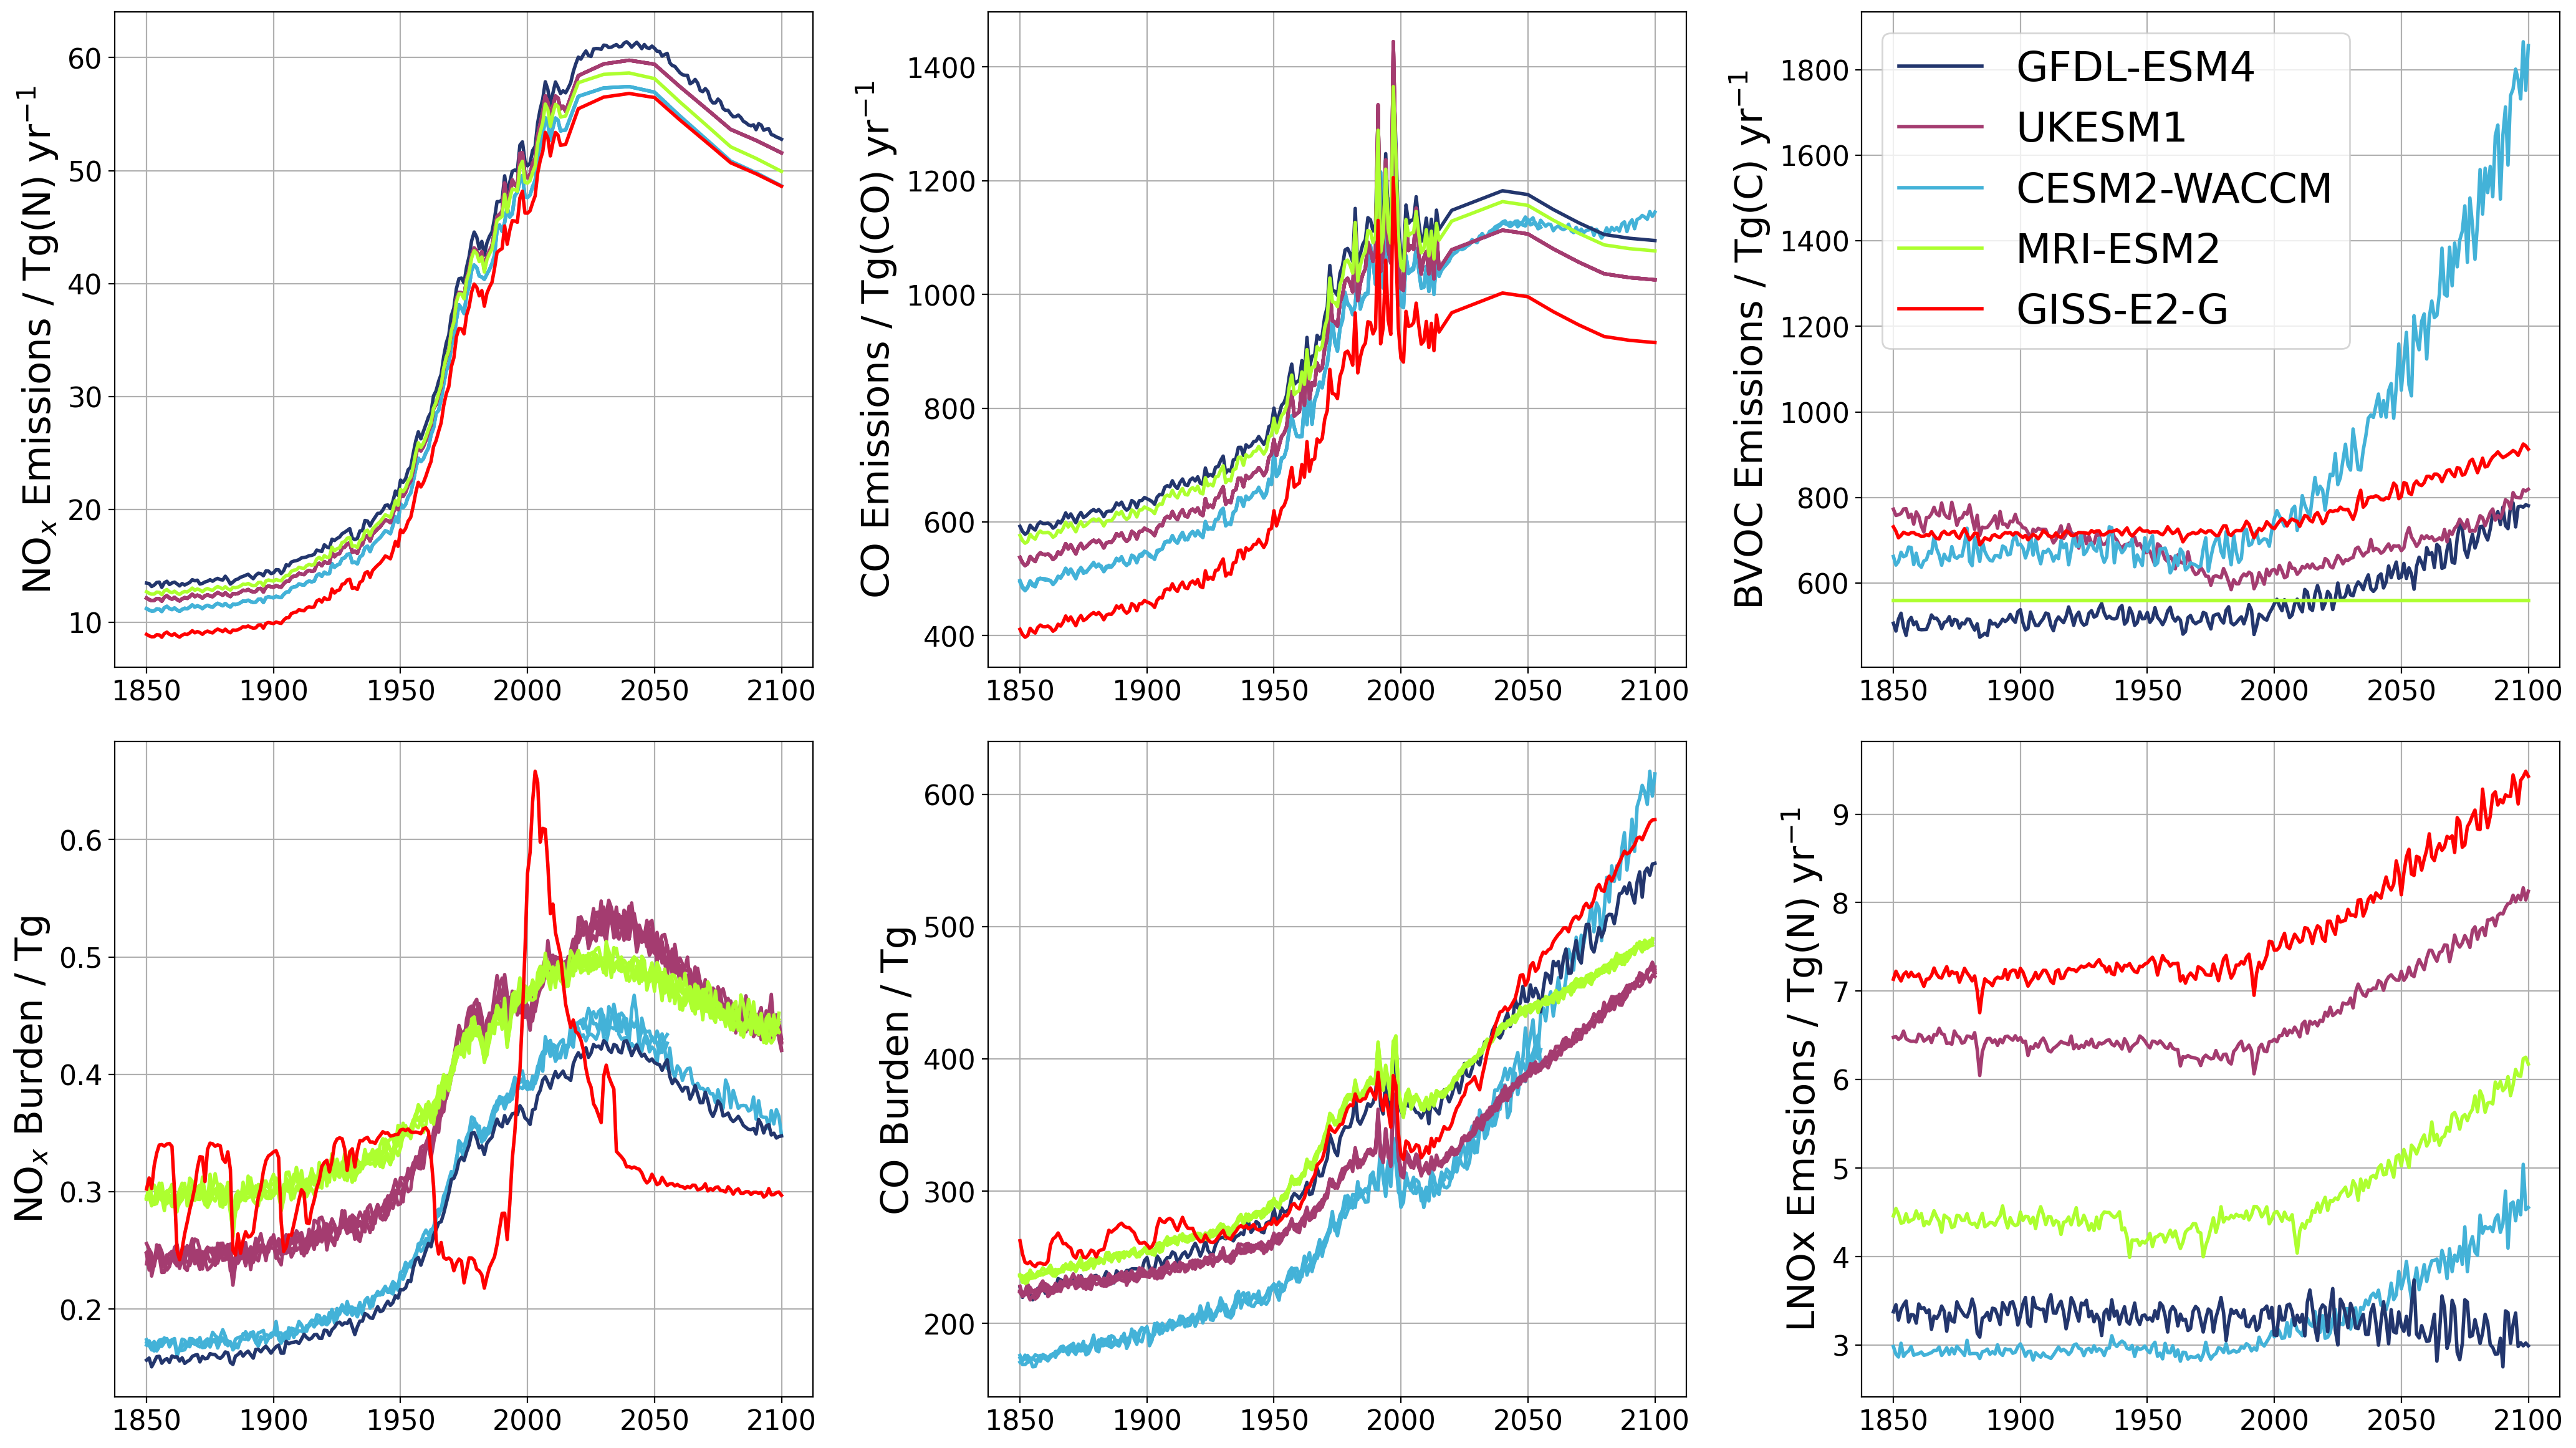

In [25]:
plt.figure(figsize=(21,12), dpi=200)
plt.subplot(2,3,1)
cmip6_ems['eminox_CESM2-WACCM_r1i1p1f1'].plot( color='#43B2D8')
cmip6_ems['eminox_CESM2-WACCM_r2i1p1f1'].plot( color='#43B2D8')
cmip6_ems['eminox_CESM2-WACCM_r2i1p1f1'].plot( color='#43B2D8')
cmip6_ems['eminox_GFDL-ESM4_r1i1p1f1'].plot(color='#23366D')
cmip6_ems['eminox_UKESM1-0-LL_r1i1p1f2'].plot(color='#A43C70')
cmip6_ems['eminox_UKESM1-0-LL_r2i1p1f2'].plot(color='#A43C70')
cmip6_ems['eminox_UKESM1-0-LL_r3i1p1f2'].plot(color='#A43C70')
cmip6_ems['eminox_UKESM1-0-LL_r4i1p1f2'].plot(color='#A43C70')
cmip6_ems['eminox_UKESM1-0-LL_r8i1p1f2'].plot(color='#A43C70')
mri_eminox['r1i1p1f1'].plot(color='#ADFF2F')
(giss_data['ENOx (TgN/yr)'] - giss_data['Lightning NOx (TgN/yr)']).plot(color='r')#'#771D7B')
plt.ylabel('NO$_x$ Emissions / Tg(N) yr$^{-1}$', fontsize=22)
plt.xlabel('')


plt.subplot(2,3,2)
cmip6_ems['emico_CESM2-WACCM_r1i1p1f1'].plot( color='#43B2D8')
cmip6_ems['emico_CESM2-WACCM_r2i1p1f1'].plot( color='#43B2D8')
cmip6_ems['emico_CESM2-WACCM_r2i1p1f1'].plot( color='#43B2D8')
cmip6_ems['emico_GFDL-ESM4_r1i1p1f1'].plot(color='#23366D')
cmip6_ems['emico_UKESM1-0-LL_r1i1p1f2'].plot(color='#A43C70')
cmip6_ems['emico_UKESM1-0-LL_r2i1p1f2'].plot(color='#A43C70')
cmip6_ems['emico_UKESM1-0-LL_r3i1p1f2'].plot(color='#A43C70')
cmip6_ems['emico_UKESM1-0-LL_r4i1p1f2'].plot(color='#A43C70')
cmip6_ems['emico_UKESM1-0-LL_r8i1p1f2'].plot(color='#A43C70')
mri_emico['r1i1p1f1'].plot(color='#ADFF2F')
giss_data['ECO (Tg/yr)'].plot(color='r')#'#771D7B')
plt.ylabel('CO Emissions / Tg(CO) yr$^{-1}$', fontsize=22)
plt.xlabel('')

plt.subplot(2,3,3)
#plt.hold(True)
plt.plot(gfdl_emisums_monthly['year_month_level_0'], gfdl_emisums_monthly.emibvoc/1e9, color='#23366D', label='GFDL-ESM4')
plt.plot(ukesm1_emisums_monthly['year_month_level_0'], ukesm1_emisums_monthly.emibvoc/1e9, label='UKESM1',color='#A43C70' )
plt.plot(cesm2_waccm_emisums_monthly['year_month_level_0'], cesm2_waccm_emisums_monthly/1e9, label='CESM2-WACCM',color='#43B2D8')
mri_emibvoc['r1i1p1f1'].plot(color='#ADFF2F', label='MRI-ESM2')
giss_data['Biogenic NMVOC (TgC/yr)'].plot(color='r', label='GISS-E2-G')
plt.ylabel('BVOC Emissions / Tg(C) yr$^{-1}$', fontsize=22)
plt.xlabel('')
plt.legend( loc='upper left',fontsize=24)

plt.subplot(2,3,4)
# (cmip6_bdn['no_burden_CESM2-WACCM_r1i1p1f1']/1e9).plot( color='#43B2D8')
# (cmip6_bdn['no_burden_CESM2-WACCM_r2i1p1f1']/1e9).plot( color='#43B2D8')
# (cmip6_bdn['no_burden_CESM2-WACCM_r3i1p1f1']/1e9).plot( color='#43B2D8')
# (cmip6_bdn['no_burden_GFDL-ESM4_r1i1p1f1']/1e9).plot(color='#23366D')
# (cmip6_bdn['no_burden_UKESM1-0-LL_r1i1p1f2']/1e9).plot(color='#A43C70')
# (cmip6_bdn['no_burden_UKESM1-0-LL_r2i1p1f2']/1e9).plot(color='#A43C70')
# (cmip6_bdn['no_burden_UKESM1-0-LL_r3i1p1f2']/1e9).plot(color='#A43C70')
# (cmip6_bdn['no_burden_UKESM1-0-LL_r4i1p1f2']/1e9).plot(color='#A43C70')
# (cmip6_bdn['no_burden_UKESM1-0-LL_r8i1p1f2']/1e9).plot(color='#A43C70')

# (cmip6_bdn['no2_burden_CESM2-WACCM_r1i1p1f1']/1e9).plot( color='#43B2D8', linestyle='--')
# (cmip6_bdn['no2_burden_CESM2-WACCM_r2i1p1f1']/1e9).plot( color='#43B2D8', linestyle='--')
# (cmip6_bdn['no2_burden_CESM2-WACCM_r3i1p1f1']/1e9).plot( color='#43B2D8', linestyle='--')
# (cmip6_bdn['no2_burden_GFDL-ESM4_r1i1p1f1']/1e9).plot(color='#23366D', linestyle='--')
# (cmip6_bdn['no2_burden_UKESM1-0-LL_r1i1p1f2']/1e9).plot(color='#A43C70', linestyle='--')
# (cmip6_bdn['no2_burden_UKESM1-0-LL_r2i1p1f2']/1e9).plot(color='#A43C70', linestyle='--')
# (cmip6_bdn['no2_burden_UKESM1-0-LL_r3i1p1f2']/1e9).plot(color='#A43C70', linestyle='--')
# (cmip6_bdn['no2_burden_UKESM1-0-LL_r4i1p1f2']/1e9).plot(color='#A43C70', linestyle='--')
# (cmip6_bdn['no2_burden_UKESM1-0-LL_r8i1p1f2']/1e9).plot(color='#A43C70', linestyle='--')

(cmip6_bdn['no_burden_CESM2-WACCM_r1i1p1f1']/1e9 + cmip6_bdn['no2_burden_CESM2-WACCM_r1i1p1f1']/1e9).plot( color='#43B2D8', lw=2)
(cmip6_bdn['no_burden_CESM2-WACCM_r2i1p1f1']/1e9 + cmip6_bdn['no2_burden_CESM2-WACCM_r2i1p1f1']/1e9).plot( color='#43B2D8', lw=2)
(cmip6_bdn['no_burden_CESM2-WACCM_r3i1p1f1']/1e9 + cmip6_bdn['no2_burden_CESM2-WACCM_r3i1p1f1']/1e9).plot( color='#43B2D8', lw=2)
(cmip6_bdn['no_burden_GFDL-ESM4_r1i1p1f1']/1e9 + cmip6_bdn['no2_burden_GFDL-ESM4_r1i1p1f1']/1e9).plot(color='#23366D', lw=2)
(cmip6_bdn['no_burden_UKESM1-0-LL_r1i1p1f2']/1e9 + cmip6_bdn['no2_burden_UKESM1-0-LL_r1i1p1f2']/1e9).plot(color='#A43C70', lw=2)
(cmip6_bdn['no_burden_UKESM1-0-LL_r2i1p1f2']/1e9 + cmip6_bdn['no2_burden_UKESM1-0-LL_r2i1p1f2']/1e9).plot(color='#A43C70', lw=2)
(cmip6_bdn['no_burden_UKESM1-0-LL_r3i1p1f2']/1e9 + cmip6_bdn['no2_burden_UKESM1-0-LL_r3i1p1f2']/1e9).plot(color='#A43C70', lw=2)
(cmip6_bdn['no_burden_UKESM1-0-LL_r4i1p1f2']/1e9 + cmip6_bdn['no2_burden_UKESM1-0-LL_r4i1p1f2']/1e9).plot(color='#A43C70', lw=2)
(cmip6_bdn['no_burden_UKESM1-0-LL_r8i1p1f2']/1e9 + cmip6_bdn['no2_burden_UKESM1-0-LL_r8i1p1f2']/1e9).plot(color='#A43C70', lw=2)


# (mri_no['r1i1p1f1']/1e9).plot(color='#ADFF2F', label='')
# (mri_no['r2i1p1f1']/1e9).plot(color='#ADFF2F', label='')
# (mri_no['r3i1p1f1']/1e9).plot(color='#ADFF2F', label='')
# (mri_no['r4i1p1f1']/1e9).plot(color='#ADFF2F', label='')
# (mri_no['r5i1p1f1']/1e9).plot(color='#ADFF2F', label='')

(mri_no['r1i1p1f1']/1e9 + mri_no2['r1i1p1f1']/1e9).plot(color='#ADFF2F', label='')
(mri_no['r2i1p1f1']/1e9 + mri_no2['r2i1p1f1']/1e9).plot(color='#ADFF2F', label='')
(mri_no['r3i1p1f1']/1e9 + mri_no2['r3i1p1f1']/1e9).plot(color='#ADFF2F', label='')
(mri_no['r4i1p1f1']/1e9 + mri_no2['r4i1p1f1']/1e9).plot(color='#ADFF2F', label='')
(mri_no['r5i1p1f1']/1e9 + mri_no2['r5i1p1f1']/1e9).plot(color='#ADFF2F', label='')
#(giss_data['NO Burden (Tg)']/1e9).plot(color='#771D7B')
(giss_data['NOx Burden (TgN)']*42/14).plot(color='r')#'#771D7B')

plt.ylabel('NO$_x$ Burden / Tg', fontsize=22)
plt.xlabel('')

plt.subplot(2,3,5)
(cmip6_bdn['co_burden_CESM2-WACCM_r1i1p1f1']/1e9).plot( color='#43B2D8', label='CESM2-WACCM')
(cmip6_bdn['co_burden_CESM2-WACCM_r2i1p1f1']/1e9).plot( color='#43B2D8', label='')
(cmip6_bdn['co_burden_CESM2-WACCM_r3i1p1f1']/1e9).plot( color='#43B2D8', label='')
(cmip6_bdn['co_burden_GFDL-ESM4_r1i1p1f1']/1e9).plot(color='#23366D', label='GFDL-ESM4')
(cmip6_bdn['co_burden_UKESM1-0-LL_r1i1p1f2']/1e9).plot(color='#A43C70', label='UKESM1')
(cmip6_bdn['co_burden_UKESM1-0-LL_r2i1p1f2']/1e9).plot(color='#A43C70', label='')
(cmip6_bdn['co_burden_UKESM1-0-LL_r3i1p1f2']/1e9).plot(color='#A43C70', label='')
(cmip6_bdn['co_burden_UKESM1-0-LL_r4i1p1f2']/1e9).plot(color='#A43C70', label='')
(cmip6_bdn['co_burden_UKESM1-0-LL_r8i1p1f2']/1e9).plot(color='#A43C70', label='')
(mri_co['r1i1p1f1']/1e9).plot(color='#ADFF2F', label='MRI-ESM2')
(mri_co['r2i1p1f1']/1e9).plot(color='#ADFF2F', label='')
(mri_co['r3i1p1f1']/1e9).plot(color='#ADFF2F', label='')
(mri_co['r4i1p1f1']/1e9).plot(color='#ADFF2F', label='')
(mri_co['r5i1p1f1']/1e9).plot(color='#ADFF2F', label='')
giss_data['CO Burden (Tg)'].plot(color='r')#'#771D7B')

plt.ylabel('CO Burden / Tg', fontsize=22)
plt.xlabel("")


plt.subplot(2,3,6)
(cesm2_waccm_emilnox['LNOx']).plot( color='#43B2D8', label='CESM2-WACCM')
(gfdl_emilnox['LNOx']).plot(color='#23366D', label='GFDL-ESM4')
(ukesm1_emilnox['LNOx']).plot(color='#A43C70', label='UKESM1')
(mri_emilnox['LNOx']).plot(color='#ADFF2F', label='MRI-ESM2')
(giss_emilnox['LNOx']).plot(color='red', label='GISS')
plt.ylabel('LNOx Emssions / Tg(N) yr$^{-1}$', fontsize=22)
plt.xlabel("")


plt.tight_layout()

In [26]:
ch4_data = pd.read_csv('CH4_input/meinshausen_data_joined_hist_ssp370.csv', sep='\t', header=0)
ch4_data.index = pd.to_datetime(ch4_data['YEARS'], format='%Y')
ch4_data = ch4_data.groupby(ch4_data.index.year).mean()

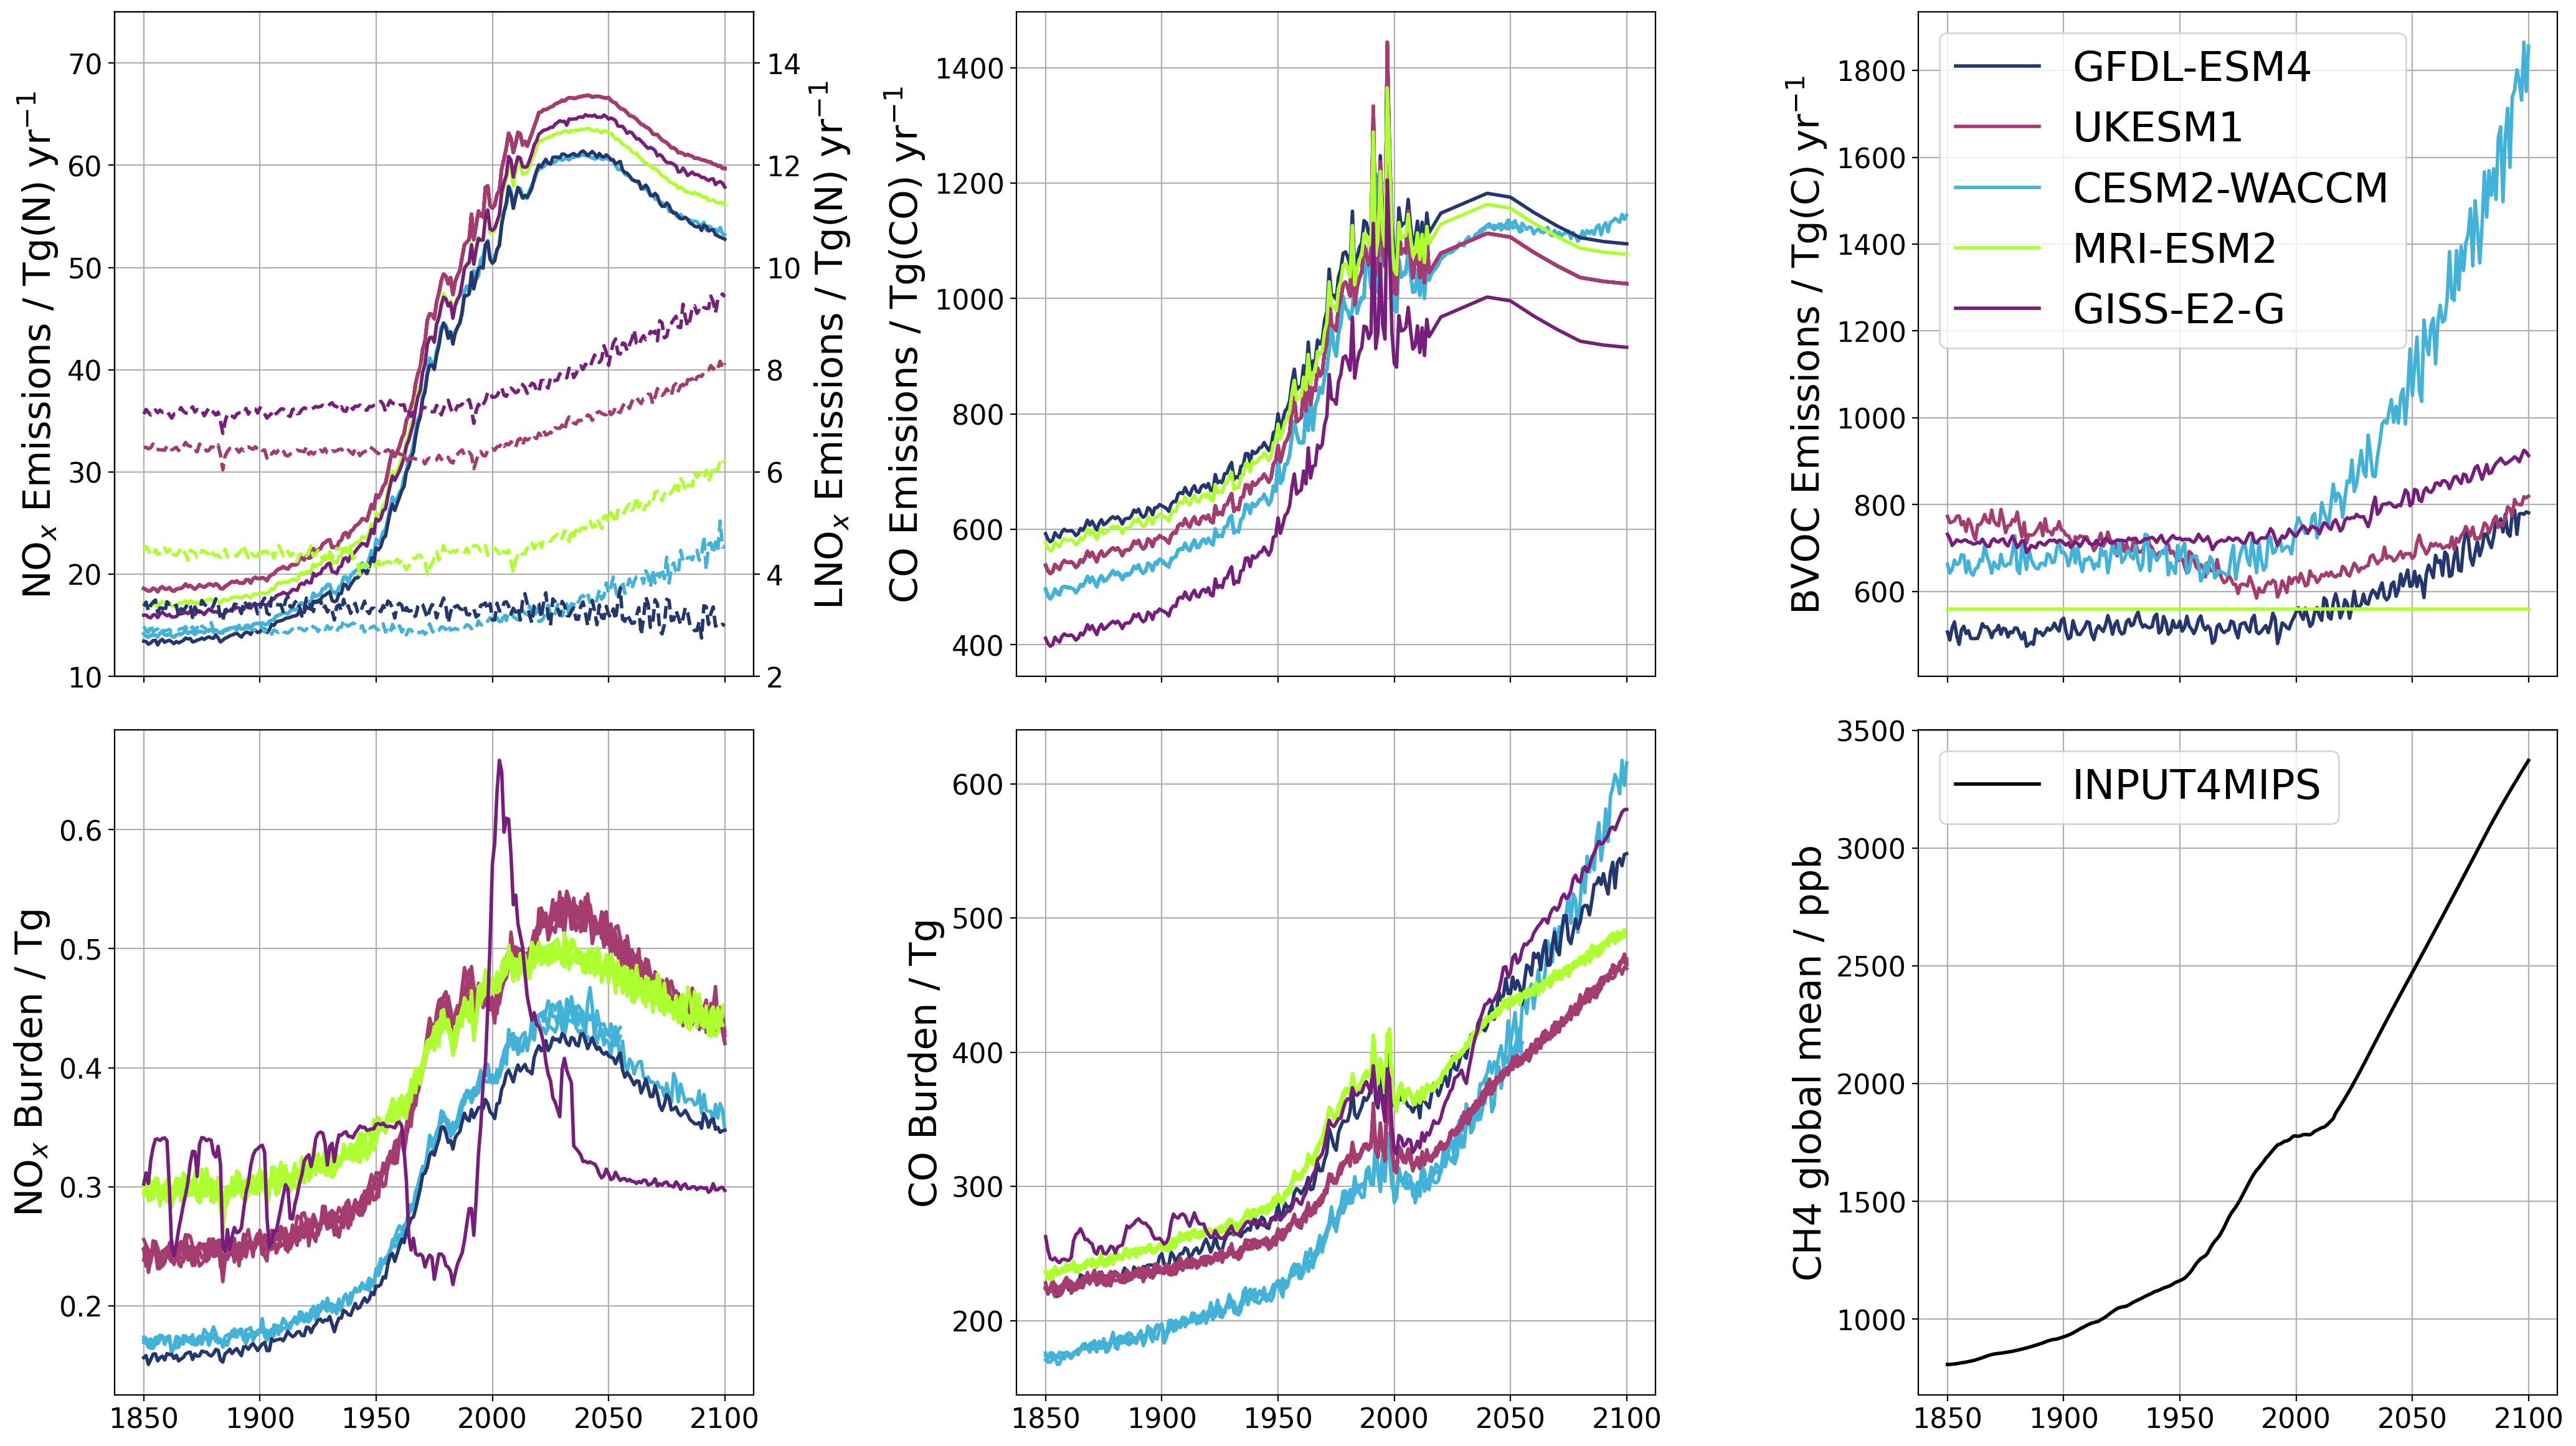

In [27]:
plt.figure(figsize=(21,12), dpi=200)
ax1 = plt.subplot(2,3,1)
(cmip6_ems['eminox_CESM2-WACCM_r1i1p1f1'] + cesm2_waccm_emilnox['LNOx']).plot(ax=ax1, color='#43B2D8')
(cmip6_ems['eminox_CESM2-WACCM_r2i1p1f1'] + cesm2_waccm_emilnox['LNOx']).plot(ax=ax1, color='#43B2D8')
(cmip6_ems['eminox_CESM2-WACCM_r2i1p1f1'] + cesm2_waccm_emilnox['LNOx']).plot(ax=ax1, color='#43B2D8')
cmip6_ems['eminox_GFDL-ESM4_r1i1p1f1'].plot(ax=ax1,color='#23366D')
(cmip6_ems['eminox_UKESM1-0-LL_r1i1p1f2'] + ukesm1_emilnox['LNOx']).plot(ax=ax1,color='#A43C70')
(cmip6_ems['eminox_UKESM1-0-LL_r2i1p1f2'] + ukesm1_emilnox['LNOx']).plot(ax=ax1,color='#A43C70')
(cmip6_ems['eminox_UKESM1-0-LL_r3i1p1f2'] + ukesm1_emilnox['LNOx']).plot(ax=ax1,color='#A43C70')
(cmip6_ems['eminox_UKESM1-0-LL_r4i1p1f2'] + ukesm1_emilnox['LNOx']).plot(ax=ax1,color='#A43C70')
(cmip6_ems['eminox_UKESM1-0-LL_r8i1p1f2'] + ukesm1_emilnox['LNOx']).plot(ax=ax1,color='#A43C70')
(mri_eminox['r1i1p1f1'] + mri_emilnox['LNOx']).plot(ax=ax1,color='#ADFF2F')
(giss_data['ENOx (TgN/yr)']).plot(color='#771D7B')#'#771D7B')
plt.ylabel('NO$_x$ Emissions / Tg(N) yr$^{-1}$', fontsize=22)
ax1.set_ylim(10,75)
plt.xlabel('')


ax1a = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax1a.set_ylabel('LNO$_x$ Emissions / Tg(N) yr$^{-1}$', fontsize=22)
(cesm2_waccm_emilnox['LNOx']).plot(ax=ax1a, color='#43B2D8', label='CESM2-WACCM', linestyle='--')
(gfdl_emilnox['LNOx']).plot(ax=ax1a,color='#23366D', label='GFDL-ESM4', linestyle='--')
(ukesm1_emilnox['LNOx']).plot(ax=ax1a,color='#A43C70', label='UKESM1', linestyle='--')
(mri_emilnox['LNOx']).plot(ax=ax1a,color='#ADFF2F', label='MRI-ESM2', linestyle='--')
(giss_emilnox['LNOx']).plot(ax=ax1a, color='#771D7B', label='GISS', linestyle='--')
ax1a.set_ylim(2,15)
ax1a.grid(None)
#plt.xlabel('')


ax = plt.subplot(2,3,2)
cmip6_ems['emico_CESM2-WACCM_r1i1p1f1'].plot( color='#43B2D8')
cmip6_ems['emico_CESM2-WACCM_r2i1p1f1'].plot( color='#43B2D8')
cmip6_ems['emico_CESM2-WACCM_r2i1p1f1'].plot( color='#43B2D8')
cmip6_ems['emico_GFDL-ESM4_r1i1p1f1'].plot(color='#23366D')
cmip6_ems['emico_UKESM1-0-LL_r1i1p1f2'].plot(color='#A43C70')
cmip6_ems['emico_UKESM1-0-LL_r2i1p1f2'].plot(color='#A43C70')
cmip6_ems['emico_UKESM1-0-LL_r3i1p1f2'].plot(color='#A43C70')
cmip6_ems['emico_UKESM1-0-LL_r4i1p1f2'].plot(color='#A43C70')
cmip6_ems['emico_UKESM1-0-LL_r8i1p1f2'].plot(color='#A43C70')
mri_emico['r1i1p1f1'].plot(color='#ADFF2F')
giss_data['ECO (Tg/yr)'].plot(color='#771D7B')#'#771D7B')
plt.ylabel('CO Emissions / Tg(CO) yr$^{-1}$', fontsize=22)
plt.xlabel('')
ax.set_xticklabels([])

ax = plt.subplot(2,3,3)
#plt.hold(True)
plt.plot(gfdl_emisums_monthly['year_month_level_0'], gfdl_emisums_monthly.emibvoc/1e9, color='#23366D', label='GFDL-ESM4')
plt.plot(ukesm1_emisums_monthly['year_month_level_0'], ukesm1_emisums_monthly.emibvoc/1e9, label='UKESM1',color='#A43C70' )
plt.plot(cesm2_waccm_emisums_monthly['year_month_level_0'], cesm2_waccm_emisums_monthly/1e9, label='CESM2-WACCM',color='#43B2D8')
mri_emibvoc['r1i1p1f1'].plot(color='#ADFF2F', label='MRI-ESM2')
giss_data['Biogenic NMVOC (TgC/yr)'].plot(color='#771D7B', label='GISS-E2-G')
plt.ylabel('BVOC Emissions / Tg(C) yr$^{-1}$', fontsize=22)
plt.xlabel('')
plt.legend( loc='upper left',fontsize=24)
ax.set_xticklabels([])

plt.subplot(2,3,4)
# (cmip6_bdn['no_burden_CESM2-WACCM_r1i1p1f1']/1e9).plot( color='#43B2D8')
# (cmip6_bdn['no_burden_CESM2-WACCM_r2i1p1f1']/1e9).plot( color='#43B2D8')
# (cmip6_bdn['no_burden_CESM2-WACCM_r3i1p1f1']/1e9).plot( color='#43B2D8')
# (cmip6_bdn['no_burden_GFDL-ESM4_r1i1p1f1']/1e9).plot(color='#23366D')
# (cmip6_bdn['no_burden_UKESM1-0-LL_r1i1p1f2']/1e9).plot(color='#A43C70')
# (cmip6_bdn['no_burden_UKESM1-0-LL_r2i1p1f2']/1e9).plot(color='#A43C70')
# (cmip6_bdn['no_burden_UKESM1-0-LL_r3i1p1f2']/1e9).plot(color='#A43C70')
# (cmip6_bdn['no_burden_UKESM1-0-LL_r4i1p1f2']/1e9).plot(color='#A43C70')
# (cmip6_bdn['no_burden_UKESM1-0-LL_r8i1p1f2']/1e9).plot(color='#A43C70')

# (cmip6_bdn['no2_burden_CESM2-WACCM_r1i1p1f1']/1e9).plot( color='#43B2D8', linestyle='--')
# (cmip6_bdn['no2_burden_CESM2-WACCM_r2i1p1f1']/1e9).plot( color='#43B2D8', linestyle='--')
# (cmip6_bdn['no2_burden_CESM2-WACCM_r3i1p1f1']/1e9).plot( color='#43B2D8', linestyle='--')
# (cmip6_bdn['no2_burden_GFDL-ESM4_r1i1p1f1']/1e9).plot(color='#23366D', linestyle='--')
# (cmip6_bdn['no2_burden_UKESM1-0-LL_r1i1p1f2']/1e9).plot(color='#A43C70', linestyle='--')
# (cmip6_bdn['no2_burden_UKESM1-0-LL_r2i1p1f2']/1e9).plot(color='#A43C70', linestyle='--')
# (cmip6_bdn['no2_burden_UKESM1-0-LL_r3i1p1f2']/1e9).plot(color='#A43C70', linestyle='--')
# (cmip6_bdn['no2_burden_UKESM1-0-LL_r4i1p1f2']/1e9).plot(color='#A43C70', linestyle='--')
# (cmip6_bdn['no2_burden_UKESM1-0-LL_r8i1p1f2']/1e9).plot(color='#A43C70', linestyle='--')

(cmip6_bdn['no_burden_CESM2-WACCM_r1i1p1f1']/1e9 + cmip6_bdn['no2_burden_CESM2-WACCM_r1i1p1f1']/1e9).plot( color='#43B2D8', lw=2)
(cmip6_bdn['no_burden_CESM2-WACCM_r2i1p1f1']/1e9 + cmip6_bdn['no2_burden_CESM2-WACCM_r2i1p1f1']/1e9).plot( color='#43B2D8', lw=2)
(cmip6_bdn['no_burden_CESM2-WACCM_r3i1p1f1']/1e9 + cmip6_bdn['no2_burden_CESM2-WACCM_r3i1p1f1']/1e9).plot( color='#43B2D8', lw=2)
(cmip6_bdn['no_burden_GFDL-ESM4_r1i1p1f1']/1e9 + cmip6_bdn['no2_burden_GFDL-ESM4_r1i1p1f1']/1e9).plot(color='#23366D', lw=2)
(cmip6_bdn['no_burden_UKESM1-0-LL_r1i1p1f2']/1e9 + cmip6_bdn['no2_burden_UKESM1-0-LL_r1i1p1f2']/1e9).plot(color='#A43C70', lw=2)
(cmip6_bdn['no_burden_UKESM1-0-LL_r2i1p1f2']/1e9 + cmip6_bdn['no2_burden_UKESM1-0-LL_r2i1p1f2']/1e9).plot(color='#A43C70', lw=2)
(cmip6_bdn['no_burden_UKESM1-0-LL_r3i1p1f2']/1e9 + cmip6_bdn['no2_burden_UKESM1-0-LL_r3i1p1f2']/1e9).plot(color='#A43C70', lw=2)
(cmip6_bdn['no_burden_UKESM1-0-LL_r4i1p1f2']/1e9 + cmip6_bdn['no2_burden_UKESM1-0-LL_r4i1p1f2']/1e9).plot(color='#A43C70', lw=2)
(cmip6_bdn['no_burden_UKESM1-0-LL_r8i1p1f2']/1e9 + cmip6_bdn['no2_burden_UKESM1-0-LL_r8i1p1f2']/1e9).plot(color='#A43C70', lw=2)


# (mri_no['r1i1p1f1']/1e9).plot(color='#ADFF2F', label='')
# (mri_no['r2i1p1f1']/1e9).plot(color='#ADFF2F', label='')
# (mri_no['r3i1p1f1']/1e9).plot(color='#ADFF2F', label='')
# (mri_no['r4i1p1f1']/1e9).plot(color='#ADFF2F', label='')
# (mri_no['r5i1p1f1']/1e9).plot(color='#ADFF2F', label='')

(mri_no['r1i1p1f1']/1e9 + mri_no2['r1i1p1f1']/1e9).plot(color='#ADFF2F', label='')
(mri_no['r2i1p1f1']/1e9 + mri_no2['r2i1p1f1']/1e9).plot(color='#ADFF2F', label='')
(mri_no['r3i1p1f1']/1e9 + mri_no2['r3i1p1f1']/1e9).plot(color='#ADFF2F', label='')
(mri_no['r4i1p1f1']/1e9 + mri_no2['r4i1p1f1']/1e9).plot(color='#ADFF2F', label='')
(mri_no['r5i1p1f1']/1e9 + mri_no2['r5i1p1f1']/1e9).plot(color='#ADFF2F', label='')
#(giss_data['NO Burden (Tg)']/1e9).plot(color='#771D7B')
(giss_data['NOx Burden (TgN)']*42/14).plot(color='#771D7B')

plt.ylabel('NO$_x$ Burden / Tg', fontsize=22)
plt.xlabel('')

plt.subplot(2,3,5)
(cmip6_bdn['co_burden_CESM2-WACCM_r1i1p1f1']/1e9).plot( color='#43B2D8', label='CESM2-WACCM')
(cmip6_bdn['co_burden_CESM2-WACCM_r2i1p1f1']/1e9).plot( color='#43B2D8', label='')
(cmip6_bdn['co_burden_CESM2-WACCM_r3i1p1f1']/1e9).plot( color='#43B2D8', label='')
(cmip6_bdn['co_burden_GFDL-ESM4_r1i1p1f1']/1e9).plot(color='#23366D', label='GFDL-ESM4')
(cmip6_bdn['co_burden_UKESM1-0-LL_r1i1p1f2']/1e9).plot(color='#A43C70', label='UKESM1')
(cmip6_bdn['co_burden_UKESM1-0-LL_r2i1p1f2']/1e9).plot(color='#A43C70', label='')
(cmip6_bdn['co_burden_UKESM1-0-LL_r3i1p1f2']/1e9).plot(color='#A43C70', label='')
(cmip6_bdn['co_burden_UKESM1-0-LL_r4i1p1f2']/1e9).plot(color='#A43C70', label='')
(cmip6_bdn['co_burden_UKESM1-0-LL_r8i1p1f2']/1e9).plot(color='#A43C70', label='')
(mri_co['r1i1p1f1']/1e9).plot(color='#ADFF2F', label='MRI-ESM2')
(mri_co['r2i1p1f1']/1e9).plot(color='#ADFF2F', label='')
(mri_co['r3i1p1f1']/1e9).plot(color='#ADFF2F', label='')
(mri_co['r4i1p1f1']/1e9).plot(color='#ADFF2F', label='')
(mri_co['r5i1p1f1']/1e9).plot(color='#ADFF2F', label='')
giss_data['CO Burden (Tg)'].plot(color='#771D7B')
plt.ylabel('CO Burden / Tg', fontsize=22)
plt.xlabel("")


plt.subplot(2,3,6)
ch4_data['CH4'].plot(color='k', label='INPUT4MIPS')
plt.ylabel('CH4 global mean / ppb', fontsize=22)
plt.xlabel("")
plt.legend( loc='upper left',fontsize=24)

plt.tight_layout()
plt.savefig('revised_ems_v2.pdf')